In [1]:
#Import Liberies 

In [70]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load The Data Set 

In [4]:
train_data = pd.read_csv("D:\\DataSets\\Autism-prediction\\train.csv")
test_data = pd.read_csv("D:\\DataSets\\Autism-prediction\\test.csv")

In [5]:
train_data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [6]:
test_data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,0,0,0,0,0,0,0,1,0,...,13.445319,m,Asian,no,no,United Arab Emirates,no,-0.914467,18 and more,?
1,2,1,0,0,0,1,0,0,0,0,...,25.057229,f,?,yes,no,New Zealand,no,4.553447,18 and more,Parent
2,3,1,0,0,1,0,1,0,1,0,...,28.799885,f,Asian,no,no,Austria,no,-1.581115,18 and more,Self
3,4,1,1,1,0,1,0,1,0,1,...,16.501526,f,Middle Eastern,yes,no,Bahamas,no,11.779210,18 and more,Relative
4,5,1,0,0,1,1,0,0,1,1,...,54.223869,f,White-European,no,no,Australia,no,10.717321,18 and more,Self


In [7]:
# Concate the train and test data in one varible 

In [8]:
df = pd.concat([train_data,test_data],ignore_index = True)

In [9]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0.0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0.0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1.0
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0.0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0.0


In [10]:
# Get info of datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1000 non-null   int64  
 1   A1_Score         1000 non-null   int64  
 2   A2_Score         1000 non-null   int64  
 3   A3_Score         1000 non-null   int64  
 4   A4_Score         1000 non-null   int64  
 5   A5_Score         1000 non-null   int64  
 6   A6_Score         1000 non-null   int64  
 7   A7_Score         1000 non-null   int64  
 8   A8_Score         1000 non-null   int64  
 9   A9_Score         1000 non-null   int64  
 10  A10_Score        1000 non-null   int64  
 11  age              1000 non-null   float64
 12  gender           1000 non-null   object 
 13  ethnicity        1000 non-null   object 
 14  jaundice         1000 non-null   object 
 15  austim           1000 non-null   object 
 16  contry_of_res    1000 non-null   object 
 17  used_app_before

### ID: Unique identifier for each record (integer).
### A1_Score to A10_Score: Scores from 1 to 10 for different attributes or assessments (integer).
### age: Age of the participant (float).
### gender: Gender of the participant (object/string).
### ethnicity: Ethnicity of the participant (object/string).
### jaundice: Whether the participant has a history of jaundice (object/string).
### autism: Whether the participant has a history of autism (object/string).
### country_of_res: Country of residence (object/string).
### used_app_before: Whether the participant has used the app before (object/string).
### result: Result of an assessment or test (float).
### age_desc: Description of age (object/string).
### relation: Relationship of the participant (object/string).
### Class/ASD: Class label indicating Autism Spectrum Disorder (ASD) classification (float), with some missing values.

In [11]:
# Check Missing Value in Dataset
df.isna().sum()

ID                   0
A1_Score             0
A2_Score             0
A3_Score             0
A4_Score             0
A5_Score             0
A6_Score             0
A7_Score             0
A8_Score             0
A9_Score             0
A10_Score            0
age                  0
gender               0
ethnicity            0
jaundice             0
austim               0
contry_of_res        0
used_app_before      0
result               0
age_desc             0
relation             0
Class/ASD          200
dtype: int64

In [12]:
# Check Unique value i8n target column
df['Class/ASD'].value_counts()

0.0    615
1.0    185
Name: Class/ASD, dtype: int64

## 1. Data Preprocessing 

In [13]:
# handled missing value traget column
df['Class/ASD'].isna().sum()

200

In [14]:
#using mean imputer technique for ther handled missing value
from sklearn.impute import SimpleImputer

In [15]:
mean_imputer = SimpleImputer(strategy='most_frequent')

In [16]:
# Reshape the Series to a 2D DataFrame
df['Class/ASD']=mean_imputer.fit_transform(df[['Class/ASD']])

In [17]:
df['Class/ASD'].isna().sum()

0

In [18]:
df['Class/ASD'].value_counts()

0.0    815
1.0    185
Name: Class/ASD, dtype: int64

In [19]:
# Change datatypes tagert column 
df['Class/ASD']=df['Class/ASD'].astype(int)

In [20]:
df['Class/ASD'].value_counts()

0    815
1    185
Name: Class/ASD, dtype: int64

In [21]:
# change data types of AGE columns 
df['age']=df['age'].astype(int)

In [22]:
df['age'].dtypes

dtype('int32')

In [23]:
# change data types of RESULT columns 
df['result']= df['result'].astype(int)

In [24]:
df['result'].dtypes

dtype('int32')

In [25]:
df.dtypes

ID                  int64
A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
age                 int32
gender             object
ethnicity          object
jaundice           object
austim             object
contry_of_res      object
used_app_before    object
result              int32
age_desc           object
relation           object
Class/ASD           int32
dtype: object

In [26]:
# Chnage the column name of target varibale
df= df.rename(columns={'Class/ASD':'class'})

In [27]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,class
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7,18 and more,Self,0


In [28]:
df['relation'].value_counts()

Self                        783
?                            91
Parent                       57
Relative                     53
Health care professional      8
Others                        8
Name: relation, dtype: int64

In [29]:
# Replace '?' with 'Self'
df['relation']= df['relation'].replace('?', 'Self')

In [30]:
df['relation'].value_counts()

Self                        874
Parent                       57
Relative                     53
Health care professional      8
Others                        8
Name: relation, dtype: int64

In [31]:
# Replace '?' with 'Self'
df['relation']= df['relation'].replace('?', 'Self')

In [32]:
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'class'],
      dtype='object')

In [33]:
df = df[['A1_Score','A2_Score','A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'jaundice', 'austim', 'result', 'relation', 'class']]

In [34]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,austim,result,relation,class
0,1,0,1,1,1,1,0,1,1,1,18,f,no,no,7,Self,0
1,0,0,0,0,0,0,0,0,0,1,13,f,no,no,10,Self,0
2,1,1,1,1,1,1,0,0,1,1,14,f,no,no,13,Self,1
3,0,0,0,1,0,0,0,0,0,0,61,f,no,no,1,Self,0
4,0,0,0,0,1,0,0,0,1,1,14,m,no,yes,7,Self,0


In [35]:
#  Apply Label Encoding
from sklearn.preprocessing import LabelEncoder

In [36]:
# Initialize the LabelEncoder
lr = LabelEncoder()

In [37]:
# Apply LabelEncoder to each categorical column
for column in ['gender', 'austim', 'relation','jaundice']:
    df[column] = lr.fit_transform(df[column])

In [38]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,austim,result,relation,class
0,1,0,1,1,1,1,0,1,1,1,18,0,0,0,7,4,0
1,0,0,0,0,0,0,0,0,0,1,13,0,0,0,10,4,0
2,1,1,1,1,1,1,0,0,1,1,14,0,0,0,13,4,1
3,0,0,0,1,0,0,0,0,0,0,61,0,0,0,1,4,0
4,0,0,0,0,1,0,0,0,1,1,14,1,0,1,7,4,0


## 2 . EDA

In [39]:
# Specify the columns you want to perform EDA on
columns_of_interest = ['class', 'age', 'austim','relation','jaundice']  

# Create a DataFrame with the selected columns
df_selected = df[columns_of_interest]

In [40]:
# Perform Descriptive Statistics

In [41]:
df_selected.describe(include='all')

,class,age,austim,relation,jaundice
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.185000,27.961000,0.141000,3.777000,0.240000
std,0.388492,12.808729,0.348196,0.657041,0.427297
min,0.000000,7.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,0.000000,4.000000,0.000000
50%,0.000000,25.000000,0.000000,4.000000,0.000000
75%,0.000000,32.250000,0.000000,4.000000,0.000000
max,1.000000,72.000000,1.000000,4.000000,1.000000


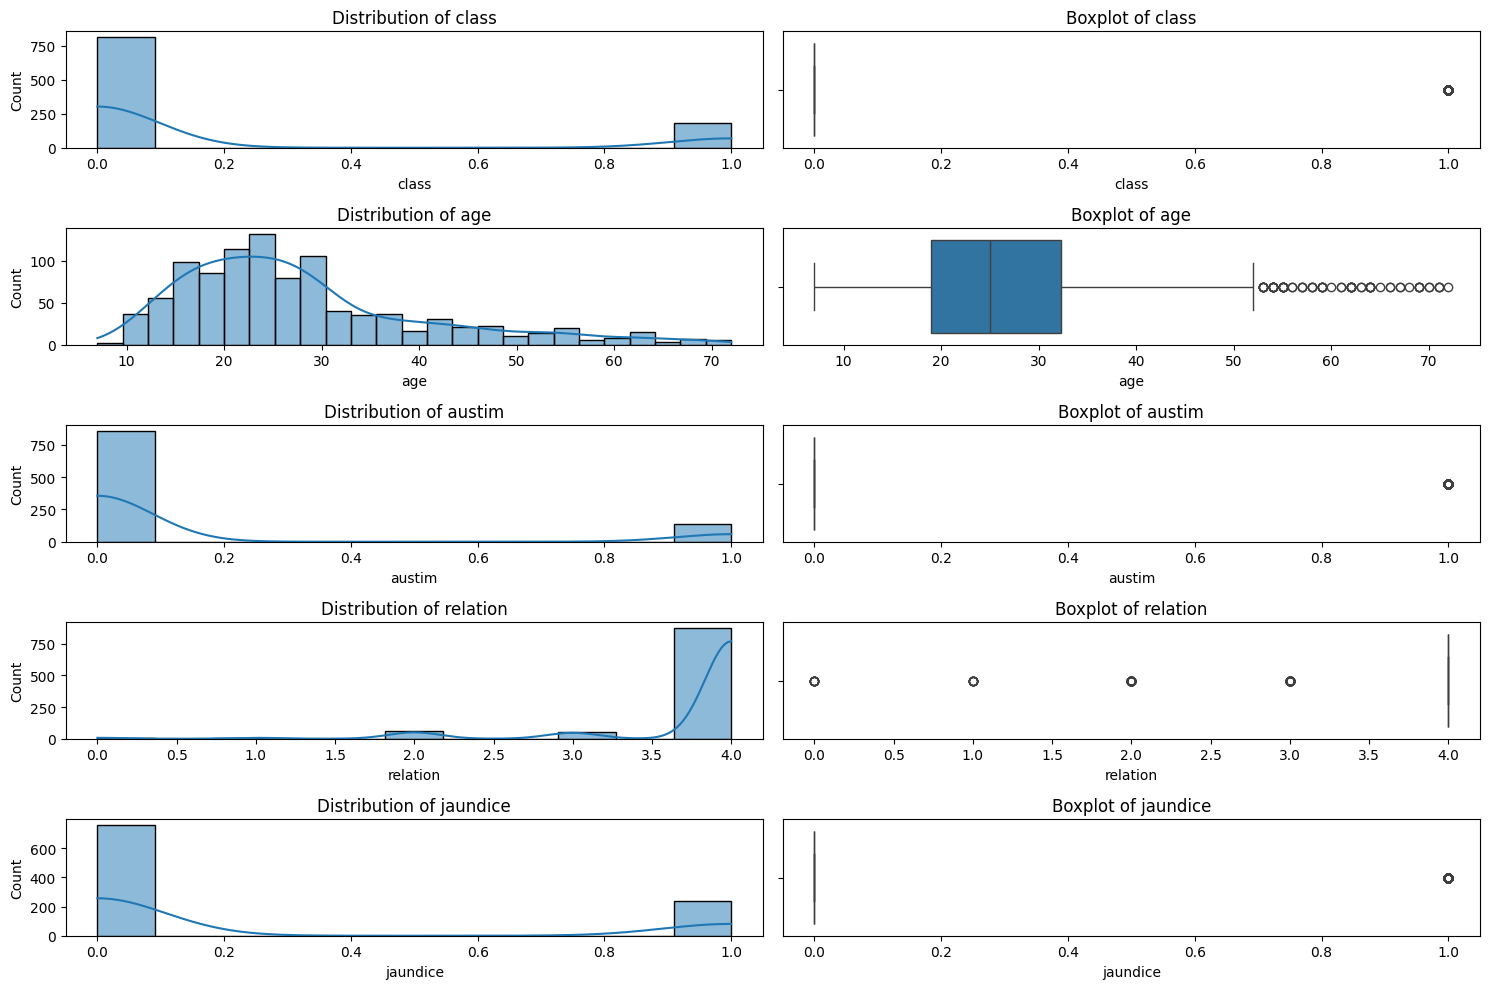

In [42]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through each column and create subplots
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(len(columns_of_interest), 2, i*2-1)
    sns.histplot(df_selected[column], kde=True)
    plt.title(f'Distribution of {column}')
    
    plt.subplot(len(columns_of_interest), 2, i*2)
    sns.boxplot(x=df_selected[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


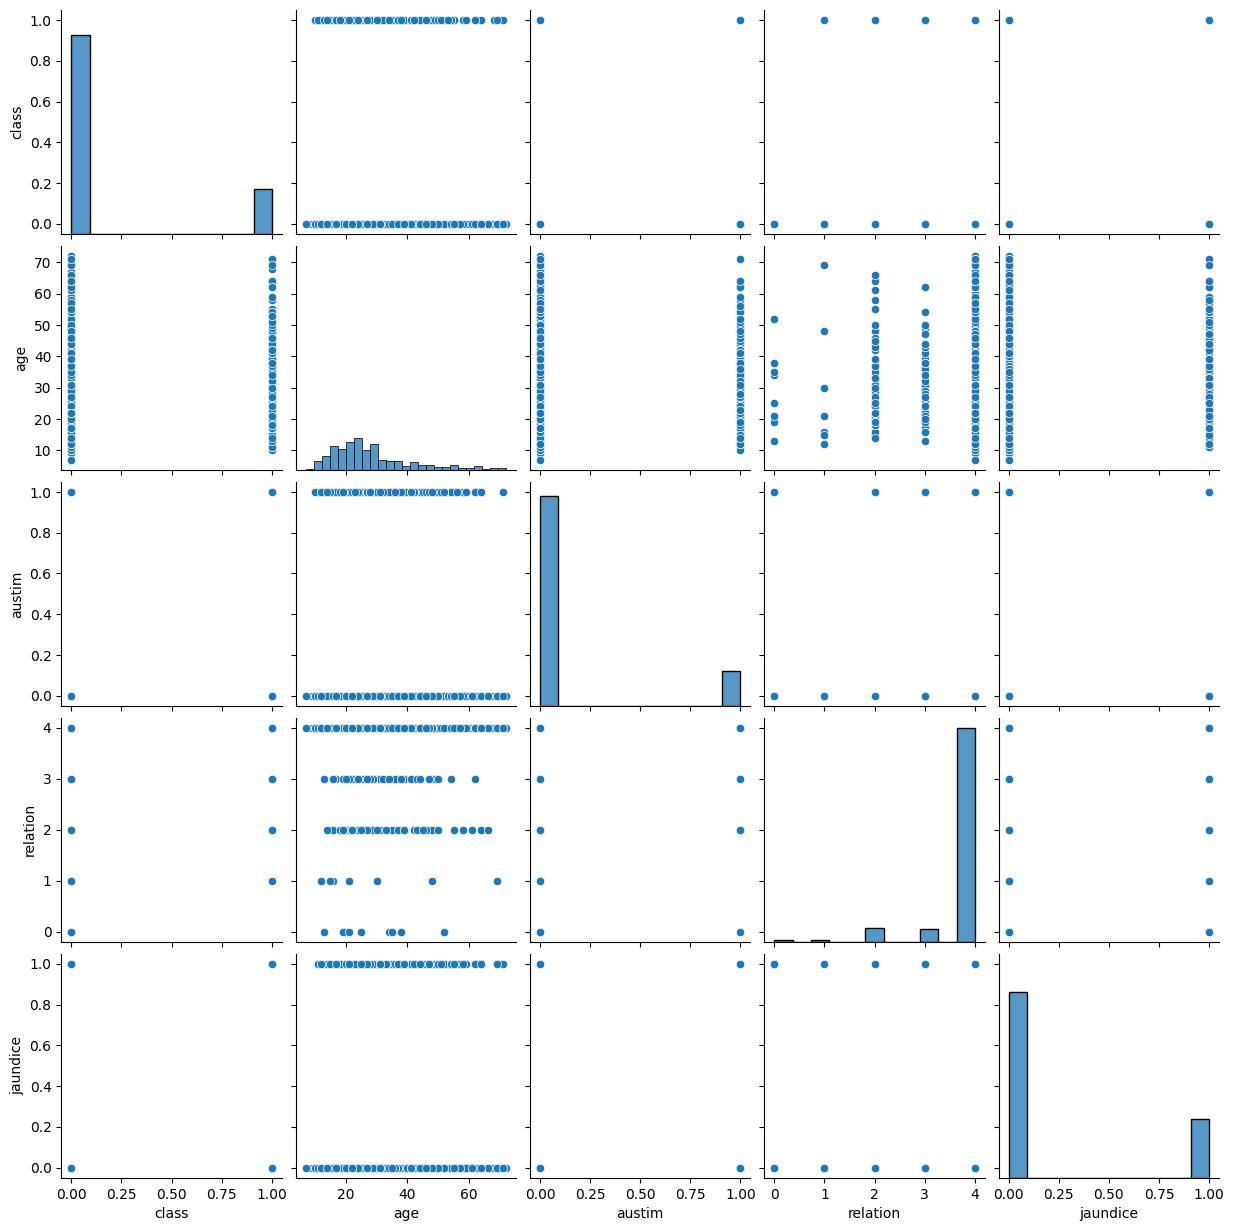

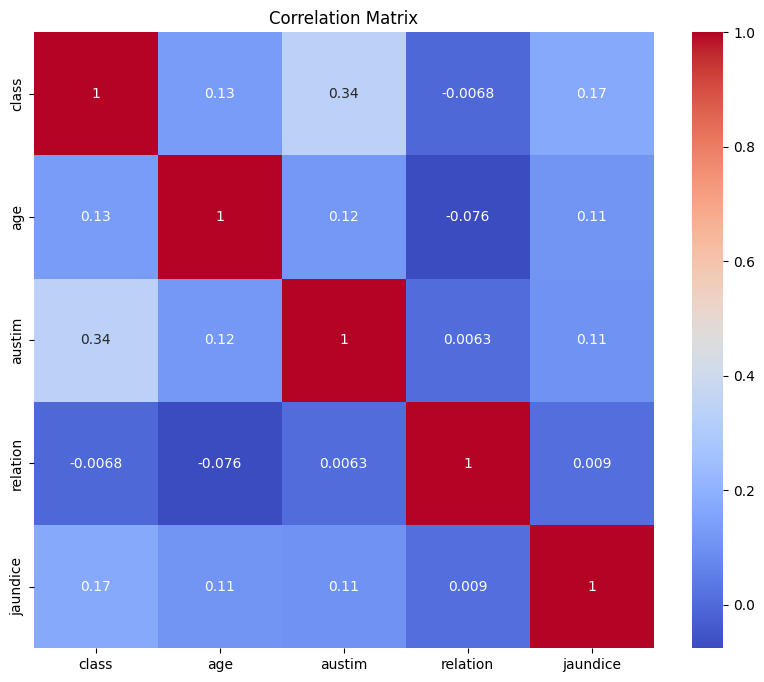

In [43]:
# Pairplot for relationships
sns.pairplot(df_selected)
plt.show()

# Heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [55]:
# divide the x and y
X = df.drop(columns = 'class', axis =True)
y =df['class']

In [56]:
X

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,austim,result,relation
0,1,0,1,1,1,1,0,1,1,1,18,0,0,0,7,4
1,0,0,0,0,0,0,0,0,0,1,13,0,0,0,10,4
2,1,1,1,1,1,1,0,0,1,1,14,0,0,0,13,4
3,0,0,0,1,0,0,0,0,0,0,61,0,0,0,1,4
4,0,0,0,0,1,0,0,0,1,1,14,1,0,1,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,1,0,0,0,22,0,0,0,6,4
996,1,1,1,0,1,0,0,0,1,1,14,0,0,1,9,4
997,1,0,1,1,1,0,0,1,1,0,37,0,1,0,8,4
998,1,1,1,1,1,1,1,1,1,1,39,0,1,0,11,4


In [73]:
# Spliting dataset in trai and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size = 0.2 ,random_state = 42)

In [75]:
X_test.shape

(200, 16)

In [76]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3. Build Model

In [84]:
#1 . Logistics Algorithms 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [78]:
# Logistic Regression
lr = LogisticRegression()
lr_params = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

lr_grid = GridSearchCV(lr, lr_params, cv=5)
lr_grid.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", lr_grid.best_params_)
lr_best = lr_grid.best_estimator_

y_pred_lr = lr_best.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       168
           1       0.63      0.53      0.58        32

    accuracy                           0.88       200
   macro avg       0.77      0.74      0.75       200
weighted avg       0.87      0.88      0.87       200

Logistic Regression Accuracy: 0.875


In [80]:
# Random Forest
rf = RandomForestClassifier()
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(X_train, y_train)

print("Best parameters for Random Forest:", rf_grid.best_params_)
rf_best = rf_grid.best_estimator_

y_pred_rf = rf_best.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       168
           1       0.58      0.47      0.52        32

    accuracy                           0.86       200
   macro avg       0.74      0.70      0.72       200
weighted avg       0.85      0.86      0.85       200

Random Forest Accuracy: 0.86


In [81]:
# Decision Tree
dt = DecisionTreeClassifier()
dt_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

dt_grid = GridSearchCV(dt, dt_params, cv=5)
dt_grid.fit(X_train, y_train)

print("Best parameters for Decision Tree:", dt_grid.best_params_)
dt_best = dt_grid.best_estimator_

y_pred_dt = dt_best.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 10}
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       168
           1       0.56      0.44      0.49        32

    accuracy                           0.85       200
   macro avg       0.73      0.69      0.70       200
weighted avg       0.84      0.85      0.85       200

Decision Tree Accuracy: 0.855


In [82]:
# Support Vector Machine
svm = SVC()
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(svm, svm_params, cv=5)
svm_grid.fit(X_train, y_train)

print("Best parameters for SVM:", svm_grid.best_params_)
svm_best = svm_grid.best_estimator_

y_pred_svm = svm_best.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


Best parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       168
           1       0.52      0.53      0.52        32

    accuracy                           0.84       200
   macro avg       0.71      0.72      0.72       200
weighted avg       0.85      0.84      0.85       200

SVM Accuracy: 0.845


In [85]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(knn, knn_params, cv=5)
knn_grid.fit(X_train, y_train)

print("Best parameters for KNN:", knn_grid.best_params_)
knn_best = knn_grid.best_estimator_

y_pred_knn = knn_best.predict(X_test)
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       168
           1       0.46      0.41      0.43        32

    accuracy                           0.83       200
   macro avg       0.68      0.66      0.67       200
weighted avg       0.82      0.83      0.83       200

KNN Accuracy: 0.83


In [86]:
# save the model 
import pickle

In [87]:
# Save the trained model using pickle
model_filename = 'logistic_regression_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(lr_best, file)

print(f"Logistic Regression model saved as {model_filename}")

Logistic Regression model saved as logistic_regression_model.pkl
